In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
df  = pd.read_csv('breast-cancer.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [5]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

 Data Distribution


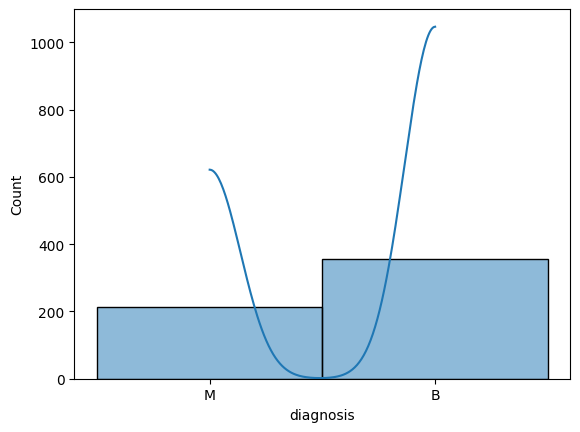

In [10]:
sns.histplot(df['diagnosis'],kde=True)
plt.show()

Data Distribution

In [12]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [16]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

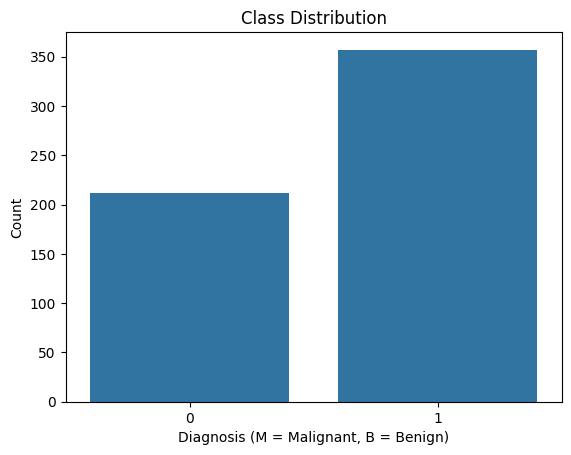

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.xlabel("Diagnosis (M = Malignant, B = Benign)")
plt.ylabel("Count")
plt.show()


In [18]:
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [19]:
df.dtypes

,0
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


Split Features and Target

In [20]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Standardisation

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)


In [28]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

In [38]:
print(f'Random Forest Accuracy: {rf_acc}')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)



Random Forest Accuracy: 0.9649122807017544
Random Forest Confusion Matrix:
[[40  3]
 [ 1 70]]


In [39]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

# Save the scaler (if you're using one)
joblib.dump(scaler, 'scaler.pkl')


NameError: name 'model' is not defined

In [40]:
import joblib

joblib.dump(log_reg, 'log_reg_model.pkl')


joblib.dump(scaler, 'scaler.pkl')

print("Logistic Regression model and scaler have been saved successfully.")


Logistic Regression model and scaler have been saved successfully.


In [41]:
from google.colab import files

files.download('log_reg_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming X_train and y_train are your features and labels for training
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view feature names and their importance scores
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance (highest to lowest)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))


                 Feature  Importance
23            area_worst    0.153892
27  concave points_worst    0.144663
7    concave points_mean    0.106210
20          radius_worst    0.077987
6         concavity_mean    0.068001
22       perimeter_worst    0.067115
2         perimeter_mean    0.053270
0            radius_mean    0.048703
3              area_mean    0.047555
26       concavity_worst    0.031802


In [44]:
# List of the clinically relevant features
important_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'texture_mean']

# Create a new dataset with only these features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_important, y_train)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test_important)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [47]:
from google.colab import files

files.download('log_reg_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset into a pandas DataFrame
# Replace 'data.csv' with your actual dataset file path
df = pd.read_csv('breast-cancer.csv')  # Make sure the dataset file is in the same folder or provide the correct path

# List of the clinically relevant features
important_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'texture_mean']

# Define the input (features) and output (target)
X = df[important_features]
y = df['diagnosis']  # Assuming the target column is named 'target' (Benign = 0, Malignant = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load dataset
df = pd.read_csv('breast-cancer.csv')
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = svm_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

# Save model and scaler
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Confusion Matrix:
 [[71  0]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy Score: 98.25%


['scaler.pkl']